# Paraphrase LambdaG Results

This notebook is used to gather and summarise the results for the different methods for the LambdaG testing. The different results are as follows:
* Paraphrase V1 - 
* Paraphrase V2 - 
* JSD - 
* Cross Entropy - 

In [279]:
import glob
import sys
import os


In [280]:
sys.path.append(os.path.abspath('../src'))

from performance import combine_and_aggregate_results_data, performance, distribution_plot, roc_plot, tippett_plot

In [281]:
v1_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_v1/Wiki-training"
v2_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_v2/Wiki-training"
jsd_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_jsd/Wiki-training"
cross_entropy_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_entropy/Wiki-training"
renyi_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_renyi/Wiki-training"
surprisal_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_surprisal/Wiki-training"
hellinger_dir = "/Volumes/BCross/datasets/author_verification/lambda_g_results/paraphrase_hellinger/Wiki-training"

In [282]:
def split_description(df: pd.DataFrame, description_col: str = 'description') -> pd.DataFrame:
    """
    Splits the `description` column into:
      - para_method
      - temp
      - para_model
      - av_method
    Inserts new columns immediately after the description column, then
    updates the description column to be `para_method + '_t_' + temp`.

    Parameters:
    -----------
    df : pd.DataFrame
        Input DataFrame containing the description column.
    description_col : str, default 'description'
        Name of the column to split.

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with the split columns inserted after description
        and description transformed to `para_method_t_temp`.
    """
    # Perform the split
    splits = df[description_col].str.split(' - ', expand=True)
    splits.columns = ['para_method', 'dummy', 'temp', 'para_model', 'av_method']
    
    # Copy to avoid modifying original
    result = df.copy()
    
    # Locate description column index
    idx = result.columns.get_loc(description_col)
    
    # Insert new columns after description in the desired order
    for i, col in enumerate(['para_method', 'temp', 'para_model', 'av_method']):
        result.insert(loc=idx + 1 + i, column=col, value=splits[col])
    
    # Update description to be para_method_t_temp
    result[description_col] = result['para_method'] + '_t_' + result['temp']
    
    return result

# Paraphrase V1

In [283]:
v1_data = combine_and_aggregate_results_data(v1_dir, method='paraphrase_v1', group_cols=['description', 'problem', 'target'])
v1_data = split_description(v1_data)
v1_data.head(4)

,method,description,para_method,temp,para_model,av_method,problem,target,score
0,paraphrase_v1,Gen_Parallel_t_1.2,Gen_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_paraphrase,142.196.88.228 vs 142.196.88.228,True,61327.789166
1,paraphrase_v1,Gen_Parallel_t_1.2,Gen_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_paraphrase,142.196.88.228 vs Aban1313,False,39052.634026
2,paraphrase_v1,Gen_Parallel_t_1.2,Gen_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_paraphrase,A_Man_In_Black vs A_Man_In_Black,True,60380.970430
3,paraphrase_v1,Gen_Parallel_t_1.2,Gen_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_paraphrase,A_Man_In_Black vs Bankhallbretherton,False,32906.574764


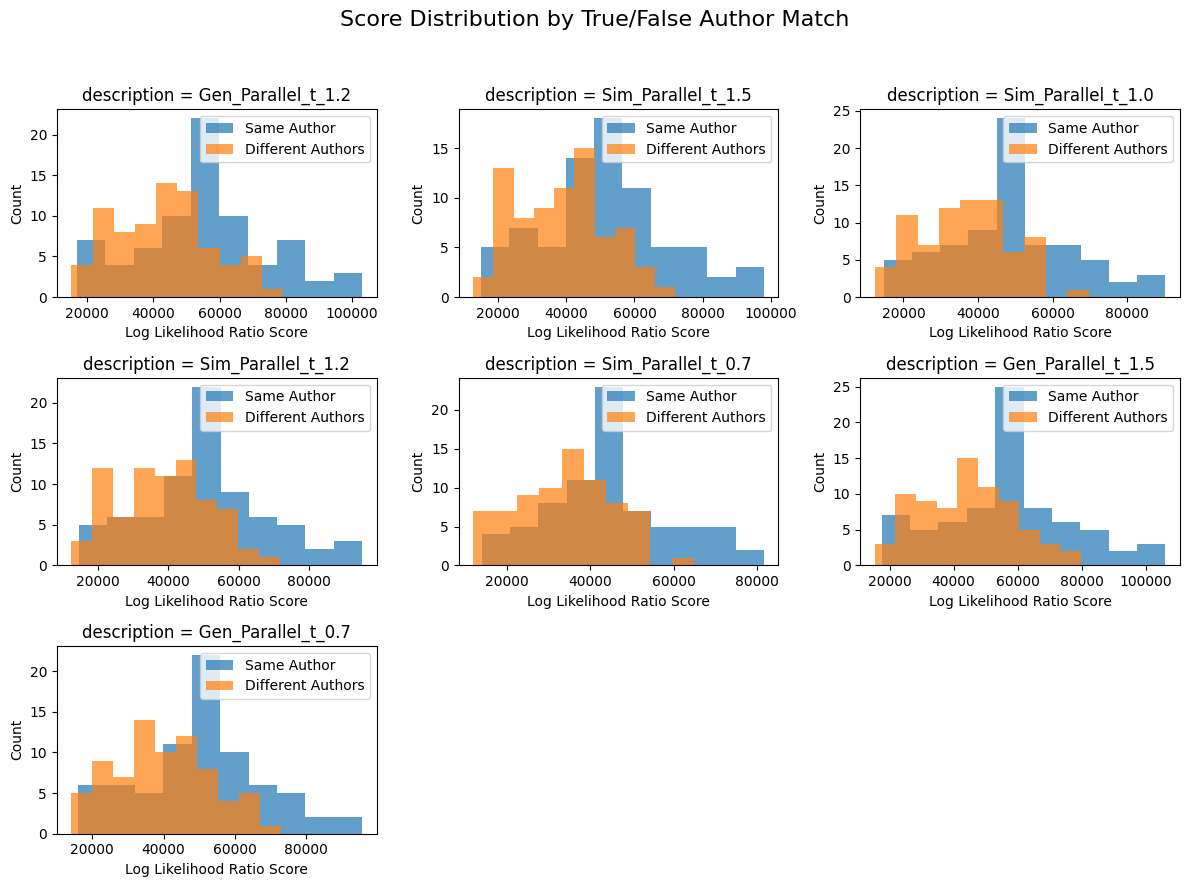

In [284]:
distribution_plot(v1_data, score_col='score', target_col='target', group_col='description')

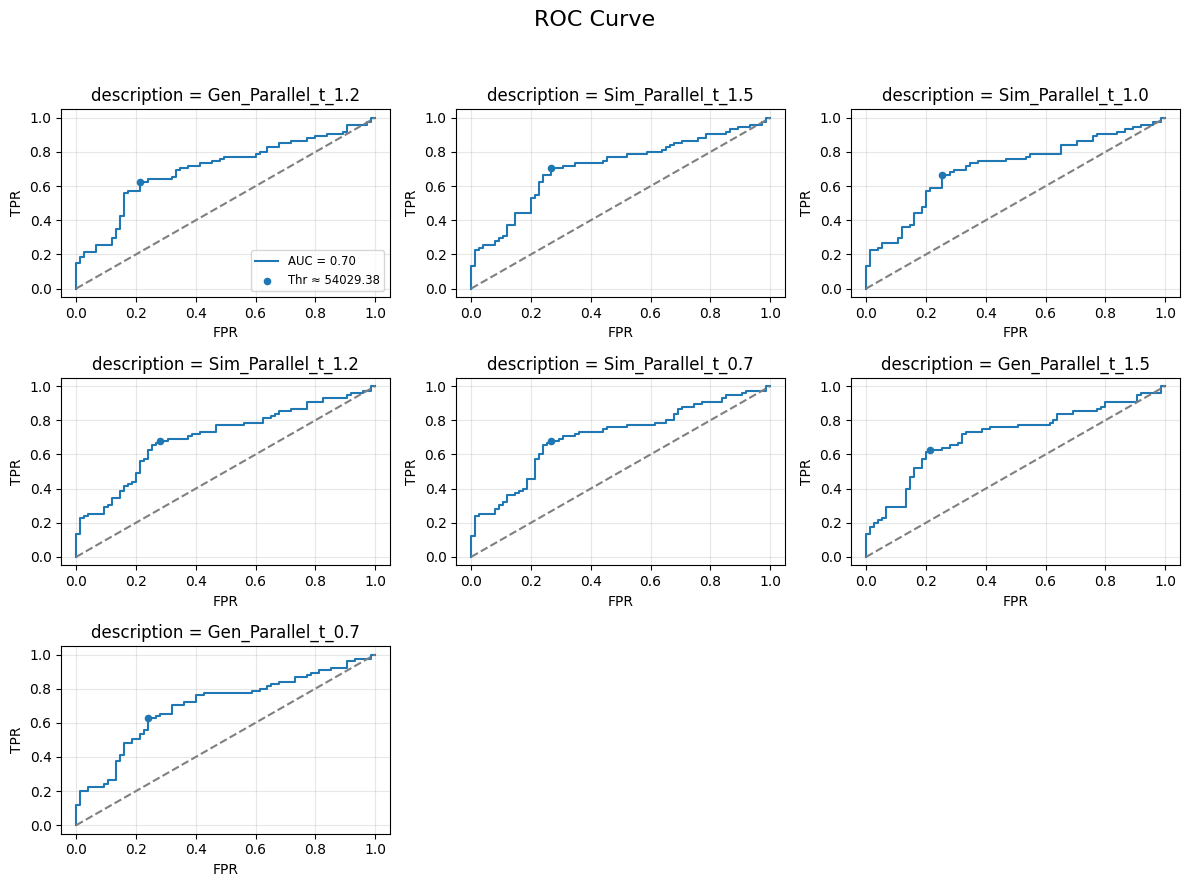

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Gen_Parallel_t_1.2  0.701867    54029.376123  0.681159  0.706667
Sim_Parallel_t_1.5  0.711644    46144.028365  0.716216  0.720000
Sim_Parallel_t_1.0  0.707022    44131.876931  0.694444  0.706667
Sim_Parallel_t_1.2  0.702933    44530.386696  0.693878  0.700000
Sim_Parallel_t_0.7  0.706489    40487.101476  0.698630  0.706667
Gen_Parallel_t_1.5  0.708089    54378.011587  0.681159  0.706667
Gen_Parallel_t_0.7  0.699556    48049.423145  0.671429  0.693333

Confusion Matrix for description = Gen_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      59      16
Actual 1      28      47

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      55      20
Actual 1      22      53

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      56      19
Actual 1      25   

In [285]:
roc_plot(v1_data, group_col='description')

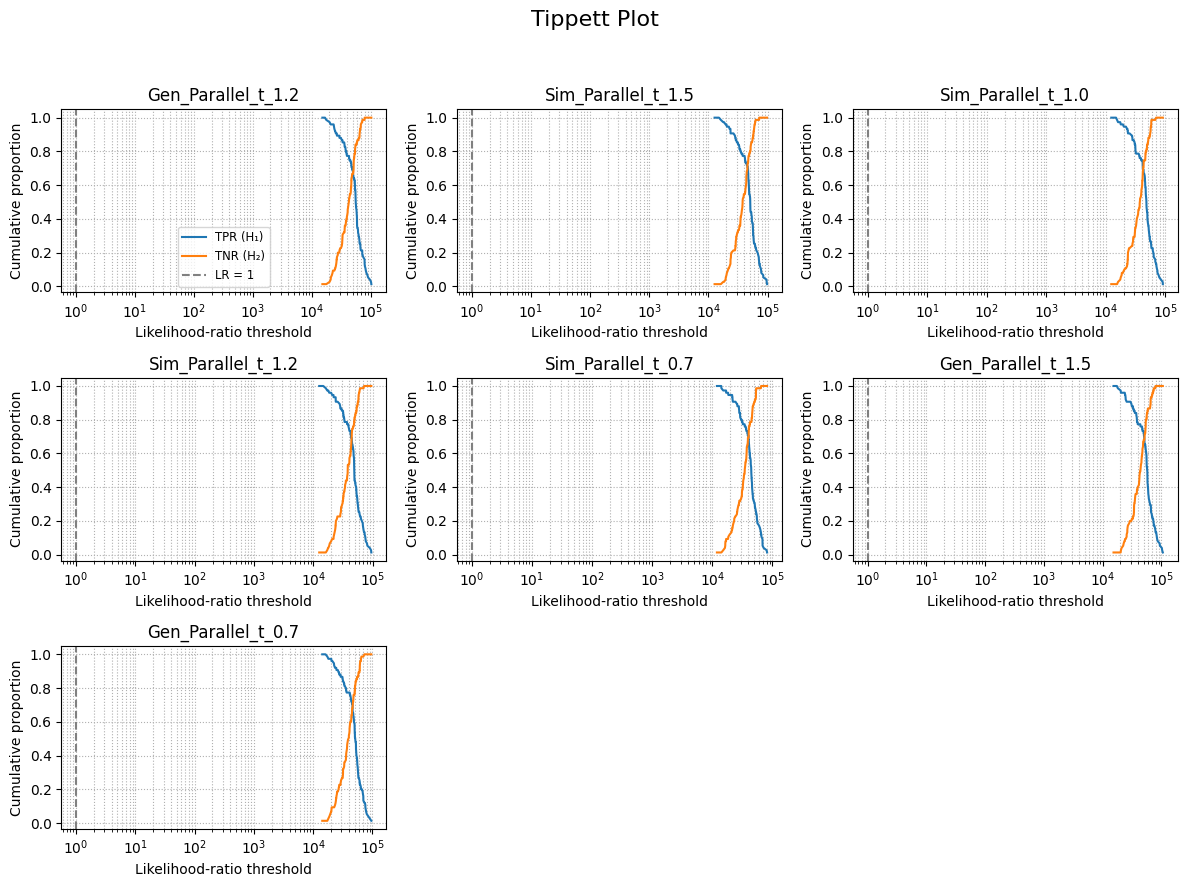

In [286]:
tippett_plot(v1_data, group_col='description')

In [287]:
score_col = 'score'
target_col = 'target'
performance(v1_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description')

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.928481,0.928481,0.333333,0.108732,-0.101975,75,75,0.684622,0.673333,0.662500,0.706667,0.683871,53,27,22,48
1,Gen_Parallel_t_1.2,Wiki-training,0.928958,0.928958,0.333333,0.108872,-0.100994,75,75,0.686400,0.673333,0.671053,0.680000,0.675497,51,25,24,50
2,Gen_Parallel_t_1.5,Wiki-training,0.925656,0.925656,0.320000,0.114647,-0.105163,75,75,0.692444,0.686667,0.684211,0.693333,0.688742,52,24,23,51
3,Sim_Parallel_t_0.7,Wiki-training,0.920754,0.920754,0.306667,0.120520,-0.112008,75,75,0.690489,0.686667,0.679487,0.706667,0.692810,53,25,22,50
4,Sim_Parallel_t_1.0,Wiki-training,0.919163,0.919163,0.306667,0.124441,-0.113186,75,75,0.690489,0.686667,0.684211,0.693333,0.688742,52,24,23,51
5,Sim_Parallel_t_1.2,Wiki-training,0.919912,0.919912,0.333333,0.123763,-0.111623,75,75,0.686222,0.673333,0.666667,0.693333,0.679739,52,26,23,49
6,Sim_Parallel_t_1.5,Wiki-training,0.912328,0.912328,0.306667,0.136066,-0.121634,75,75,0.697422,0.700000,0.692308,0.720000,0.705882,54,24,21,51


# Paraphrase V2

Paraphrase v2 is the LambdaG code in its traditional form where we lump all of the paraphrased sentences together and randomly sample them for the same number as in the known document.

Accidentally kept the r at 100

In [324]:
v2_data = combine_and_aggregate_results_data(v2_dir, method='paraphrase_v2', group_cols=['description', 'problem', 'target'])
v2_data['description'] = v2_data['description'] + ' - lambdaG_paraphrase_v2'
v2_data = split_description(v2_data)
v2_data.head(4)

,method,description,para_method,temp,para_model,av_method,problem,target,score
0,paraphrase_v2,Gen_Parallel_t_0.7,Gen_Parallel,0.7,Qwen 2.5 1.5B,lambdaG_paraphrase_v2,142.196.88.228 vs 142.196.88.228,True,59522.580412
1,paraphrase_v2,Gen_Parallel_t_0.7,Gen_Parallel,0.7,Qwen 2.5 1.5B,lambdaG_paraphrase_v2,142.196.88.228 vs Aban1313,False,37993.725317
2,paraphrase_v2,Gen_Parallel_t_0.7,Gen_Parallel,0.7,Qwen 2.5 1.5B,lambdaG_paraphrase_v2,A_Man_In_Black vs A_Man_In_Black,True,45120.069436
3,paraphrase_v2,Gen_Parallel_t_0.7,Gen_Parallel,0.7,Qwen 2.5 1.5B,lambdaG_paraphrase_v2,A_Man_In_Black vs Bankhallbretherton,False,19231.809295


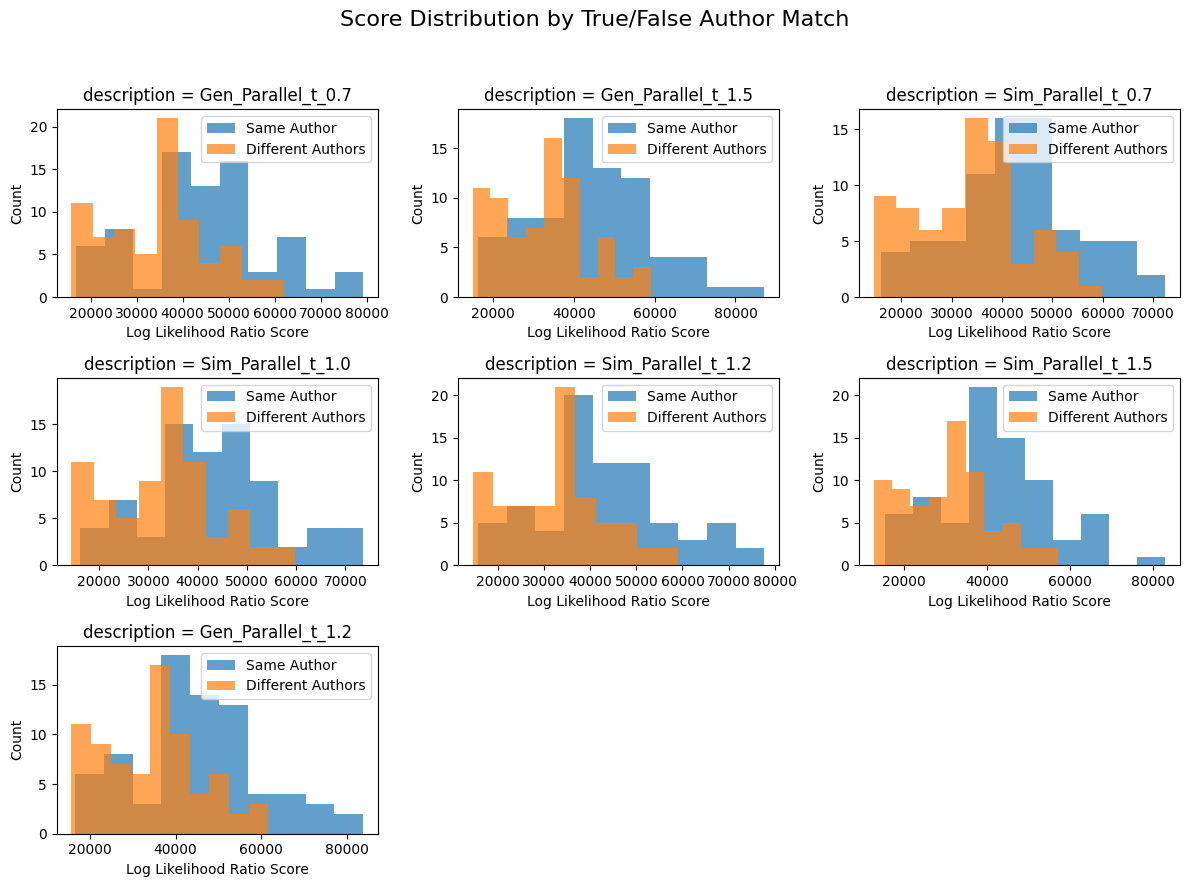

In [325]:
distribution_plot(v2_data, score_col='score', target_col='target', group_col='description')

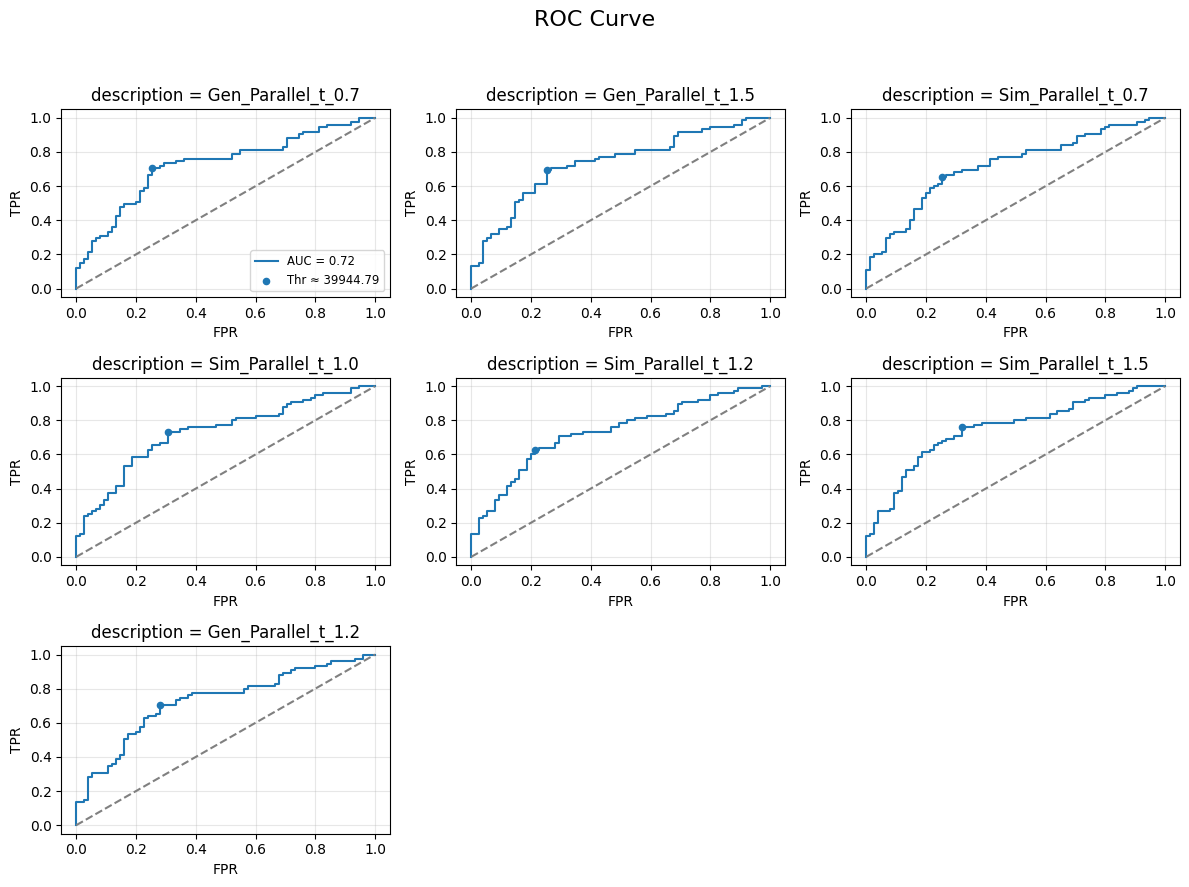

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Gen_Parallel_t_0.7  0.724978    39944.790000  0.721088  0.726667
Gen_Parallel_t_1.5  0.735111    38331.770974  0.712329  0.720000
Sim_Parallel_t_0.7  0.719467    39082.244752  0.685315  0.700000
Sim_Parallel_t_1.0  0.730844    37425.597683  0.718954  0.713333
Sim_Parallel_t_1.2  0.730489    38687.711491  0.681159  0.706667
Sim_Parallel_t_1.5  0.748089    35248.777157  0.730769  0.720000
Gen_Parallel_t_1.2  0.726578    39337.865249  0.711409  0.713333

Confusion Matrix for description = Gen_Parallel_t_0.7:
          Pred 0  Pred 1
Actual 0      56      19
Actual 1      22      53

Confusion Matrix for description = Gen_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      56      19
Actual 1      23      52

Confusion Matrix for description = Sim_Parallel_t_0.7:
          Pred 0  Pred 1
Actual 0      56      19
Actual 1      26   

In [326]:
roc_plot(v2_data, group_col='description')

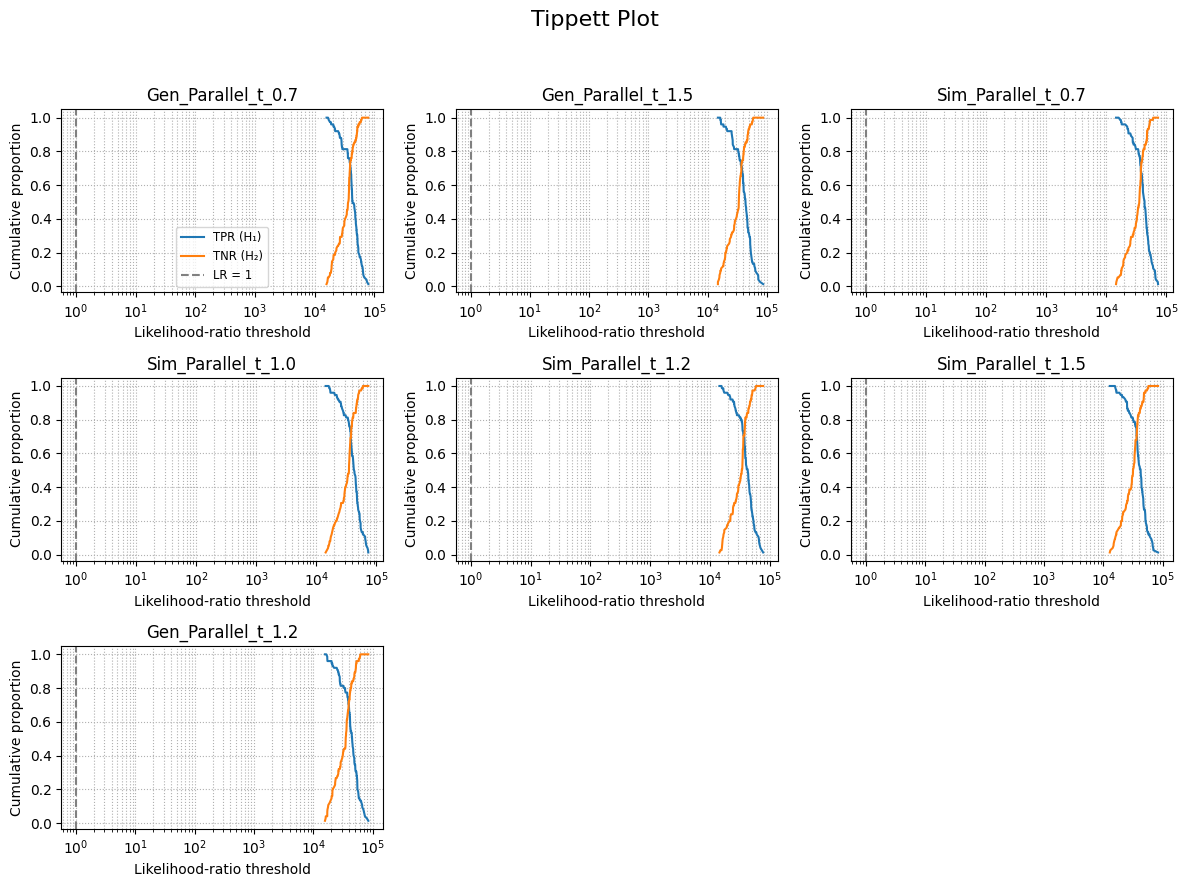

In [327]:
tippett_plot(v2_data, group_col='description')

In [328]:
performance(v2_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description')

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.912274,0.912274,0.266667,0.130737,-0.124279,75,75,0.709156,0.720000,0.726027,0.706667,0.716216,53,20,22,55
1,Gen_Parallel_t_1.2,Wiki-training,0.904510,0.904510,0.320000,0.145338,-0.132017,75,75,0.713244,0.686667,0.684211,0.693333,0.688742,52,24,23,51
2,Gen_Parallel_t_1.5,Wiki-training,0.892657,0.892657,0.280000,0.165898,-0.147440,75,75,0.718933,0.713333,0.722222,0.693333,0.707483,52,20,23,55
3,Sim_Parallel_t_0.7,Wiki-training,0.910759,0.910759,0.306667,0.132089,-0.126940,75,75,0.704889,0.686667,0.694444,0.666667,0.680272,50,22,25,53
4,Sim_Parallel_t_1.0,Wiki-training,0.900618,0.900618,0.306667,0.149910,-0.138779,75,75,0.715200,0.673333,0.680556,0.653333,0.666667,49,23,26,52
5,Sim_Parallel_t_1.2,Wiki-training,0.897442,0.897442,0.293333,0.156715,-0.141947,75,75,0.715378,0.700000,0.702703,0.693333,0.697987,52,22,23,53
6,Sim_Parallel_t_1.5,Wiki-training,0.880340,0.880340,0.293333,0.185808,-0.165157,75,75,0.734756,0.693333,0.688312,0.706667,0.697368,53,24,22,51


# Paraphrase JSD

Paraphrase v2 is the LambdaG code in its traditional form where we lump all of the paraphrased sentences together and randomly sample them for the same number as in the known document.

Accidentally kept the r at 100

In [329]:
jsd_data = combine_and_aggregate_results_data(jsd_dir, method='jsd', group_cols=['description', 'problem', 'target'])
jsd_data['description'] = jsd_data['description'] + ' - lambdaG_jsd'
jsd_data = split_description(jsd_data)
jsd_data.head()

,method,description,para_method,temp,para_model,av_method,problem,target,score
0,jsd,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_jsd,142.196.88.228 vs 142.196.88.228,True,0.253952
1,jsd,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_jsd,142.196.88.228 vs Aban1313,False,0.139634
2,jsd,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_jsd,A_Man_In_Black vs A_Man_In_Black,True,0.201292
3,jsd,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_jsd,A_Man_In_Black vs Bankhallbretherton,False,0.144601
4,jsd,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_jsd,Aban1313 vs Aban1313,True,0.179234


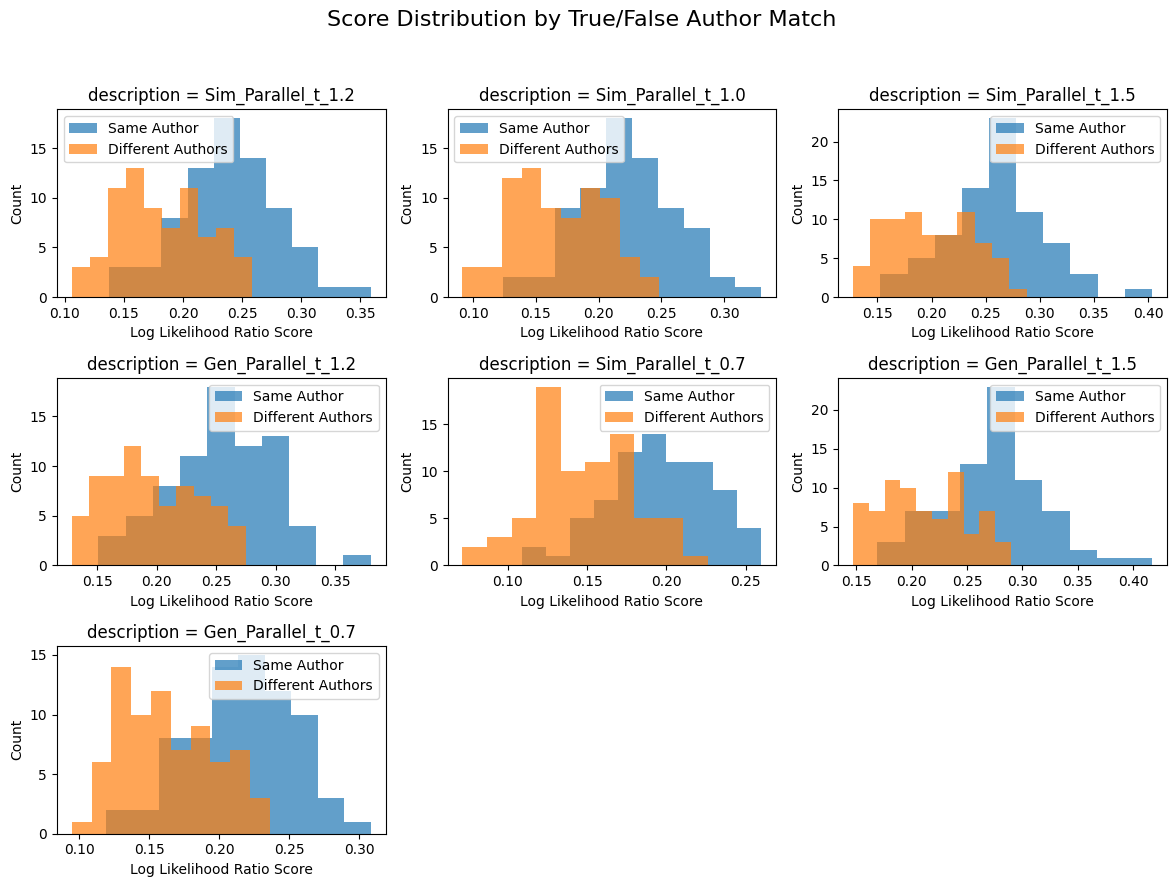

In [330]:
distribution_plot(jsd_data, score_col='score', target_col='target', group_col='description')

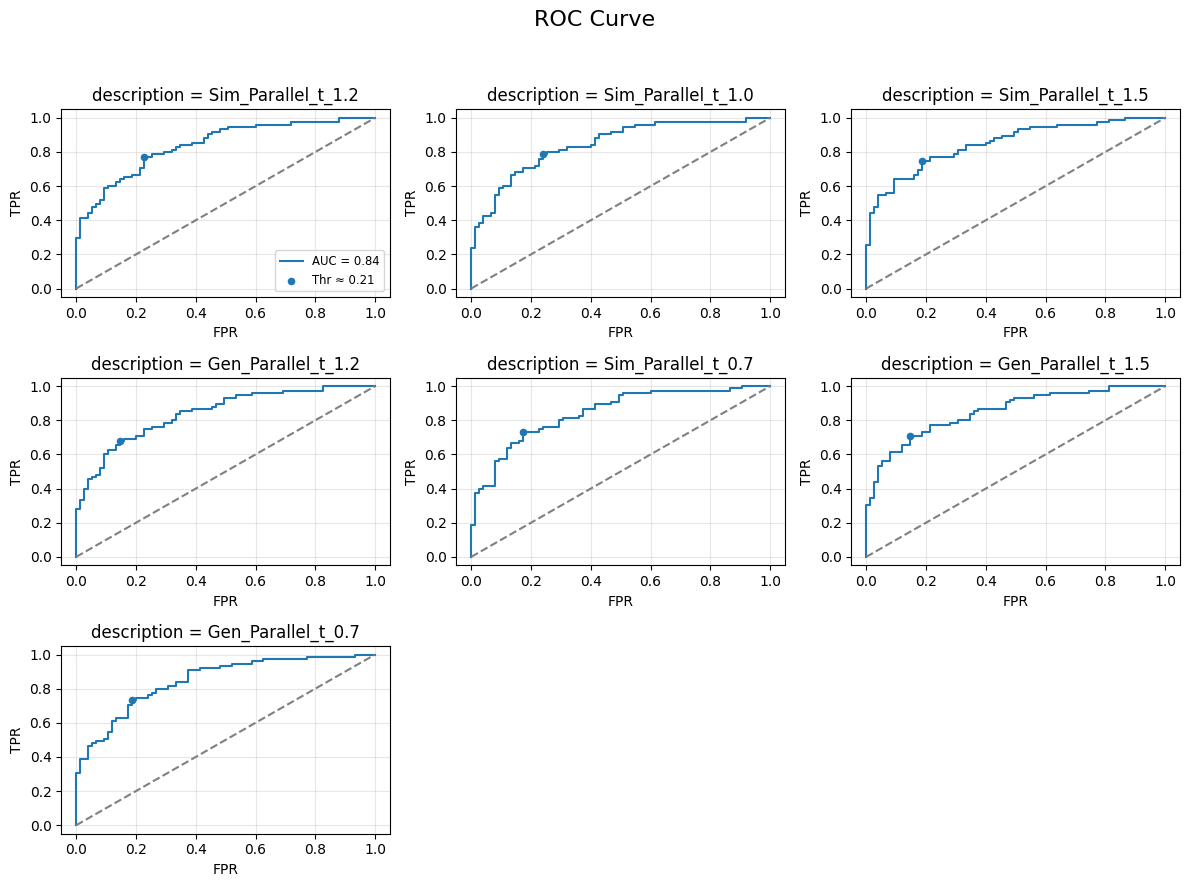

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Sim_Parallel_t_1.2  0.841600        0.211531  0.773333  0.773333
Sim_Parallel_t_1.0  0.843200        0.197179  0.776316  0.773333
Sim_Parallel_t_1.5  0.848889        0.235892  0.772414  0.780000
Gen_Parallel_t_1.2  0.842133        0.238110  0.744526  0.766667
Sim_Parallel_t_0.7  0.843200        0.176253  0.769231  0.780000
Gen_Parallel_t_1.5  0.851022        0.256687  0.762590  0.780000
Gen_Parallel_t_0.7  0.848000        0.195688  0.763889  0.773333

Confusion Matrix for description = Sim_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      58      17
Actual 1      17      58

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      57      18
Actual 1      16      59

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      61      14
Actual 1      19   

In [331]:
roc_plot(jsd_data, group_col='description')

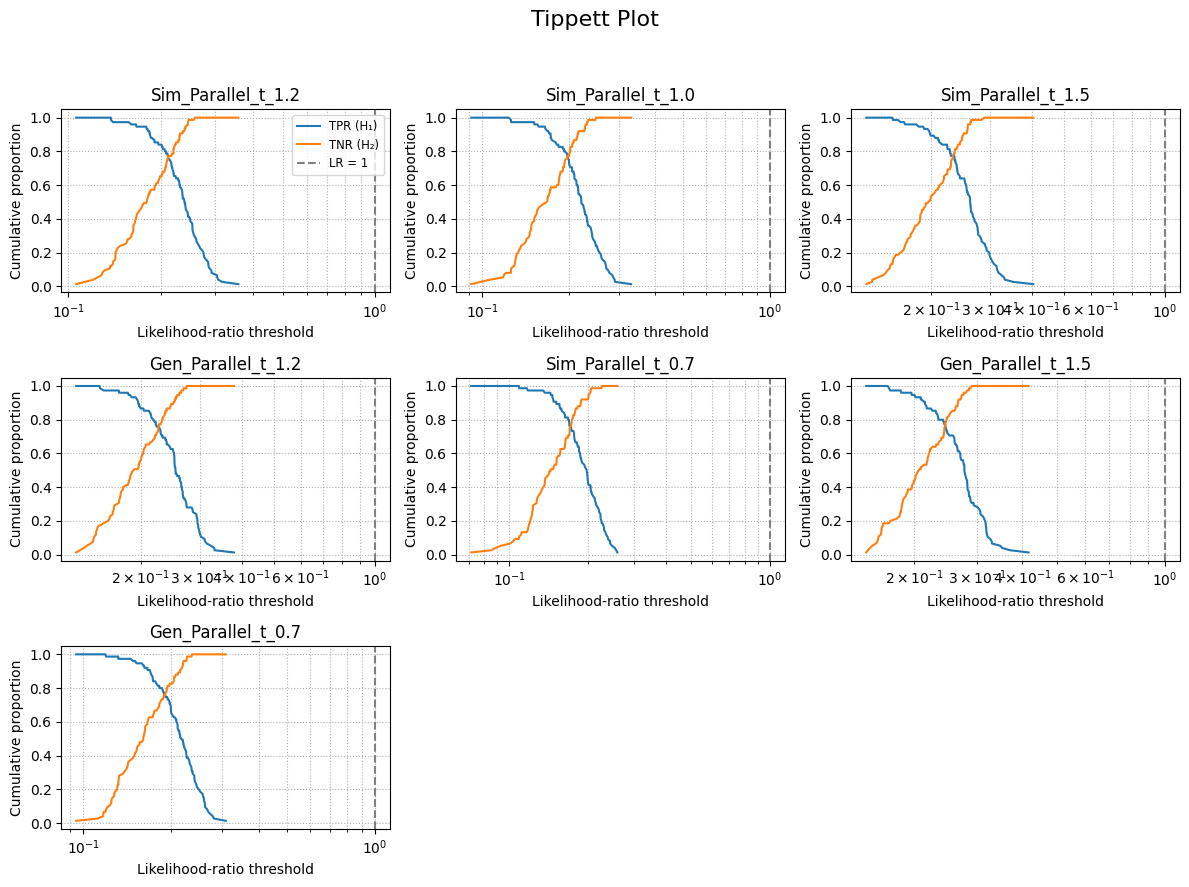

In [332]:
tippett_plot(jsd_data, group_col='description')

In [333]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(jsd_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description'
        )

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.975938,0.975938,0.293333,0.014970,-0.015187,75,75,0.772089,0.706667,0.701299,0.720000,0.710526,54,23,21,52
1,Gen_Parallel_t_1.2,Wiki-training,0.968411,0.968411,0.320000,0.019916,-0.020047,75,75,0.782933,0.693333,0.688312,0.706667,0.697368,53,24,22,51
2,Gen_Parallel_t_1.5,Wiki-training,0.964806,0.964806,0.333333,0.022273,-0.022354,75,75,0.794311,0.686667,0.679487,0.706667,0.692810,53,25,22,50
3,Sim_Parallel_t_0.7,Wiki-training,0.981525,0.981525,0.306667,0.011489,-0.011558,75,75,0.753422,0.646667,0.641026,0.666667,0.653595,50,28,25,47
4,Sim_Parallel_t_1.0,Wiki-training,0.975104,0.975104,0.293333,0.015551,-0.015745,75,75,0.769067,0.693333,0.688312,0.706667,0.697368,53,24,22,51
5,Sim_Parallel_t_1.2,Wiki-training,0.971718,0.971718,0.320000,0.017768,-0.017915,75,75,0.772978,0.686667,0.679487,0.706667,0.692810,53,25,22,50
6,Sim_Parallel_t_1.5,Wiki-training,0.967370,0.967370,0.306667,0.020594,-0.020747,75,75,0.782933,0.706667,0.691358,0.746667,0.717949,56,25,19,50


## Paraphrase Cross-Entropy

In [334]:
cross_entropy_data = combine_and_aggregate_results_data(cross_entropy_dir, method='cross-entropy', group_cols=['description', 'problem', 'target'])
cross_entropy_data = split_description(cross_entropy_data)

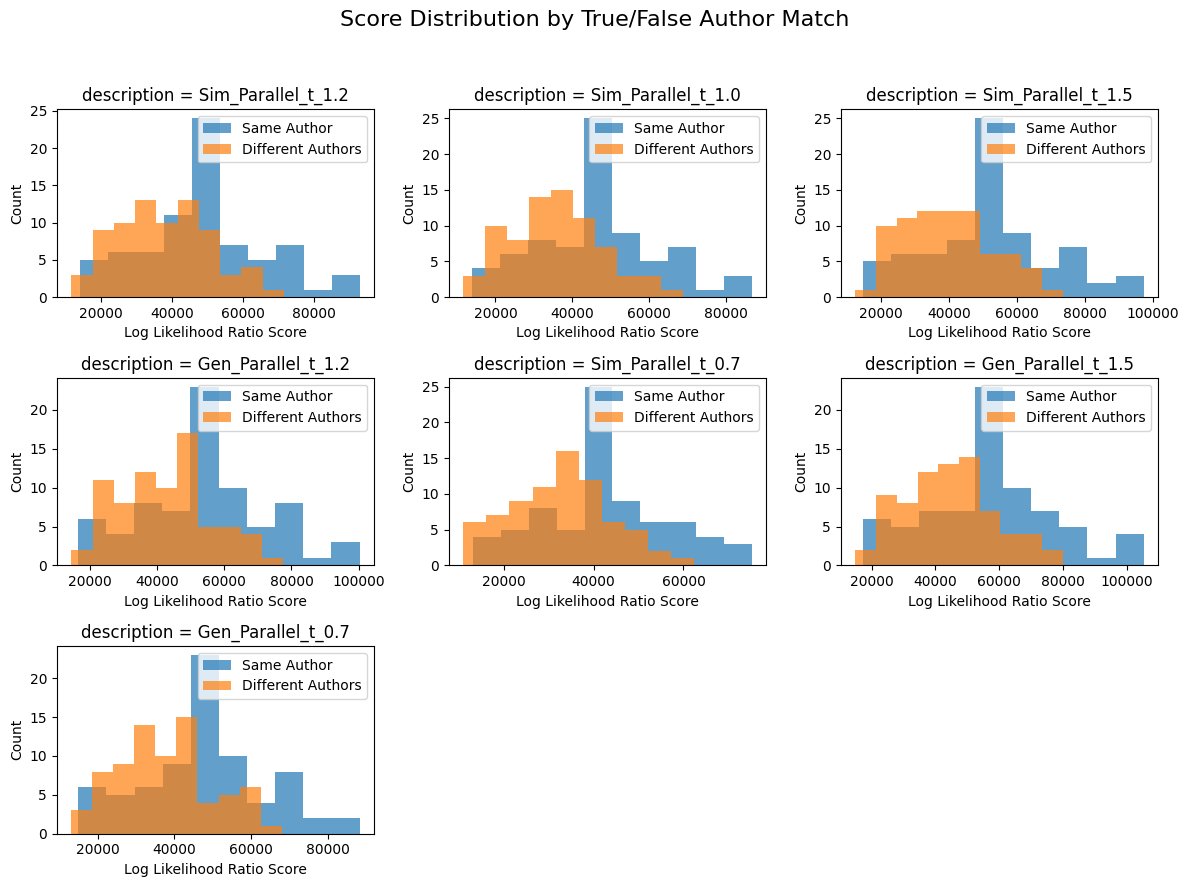

In [335]:
distribution_plot(cross_entropy_data, group_col='description')

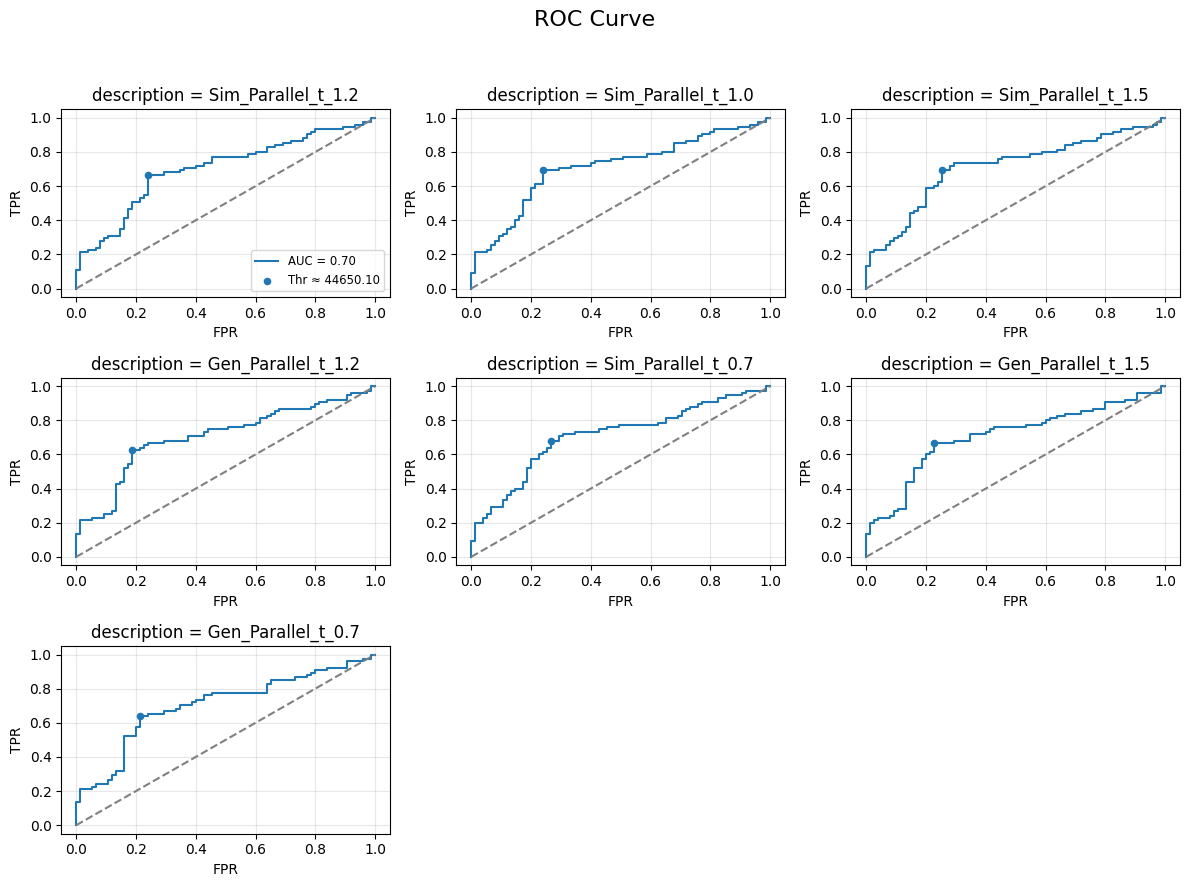

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Sim_Parallel_t_1.2  0.702222    44650.098339  0.699301  0.713333
Sim_Parallel_t_1.0  0.710400    42205.079199  0.717241  0.726667
Sim_Parallel_t_1.5  0.712000    47165.765816  0.712329  0.720000
Gen_Parallel_t_1.2  0.705600    53216.839644  0.691176  0.720000
Sim_Parallel_t_0.7  0.708622    39073.062208  0.698630  0.706667
Gen_Parallel_t_1.5  0.707022    53385.552456  0.704225  0.720000
Gen_Parallel_t_0.7  0.702756    46030.139559  0.690647  0.713333

Confusion Matrix for description = Sim_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      57      18
Actual 1      25      50

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      57      18
Actual 1      23      52

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      56      19
Actual 1      23   

In [336]:
roc_plot(cross_entropy_data, group_col='description')

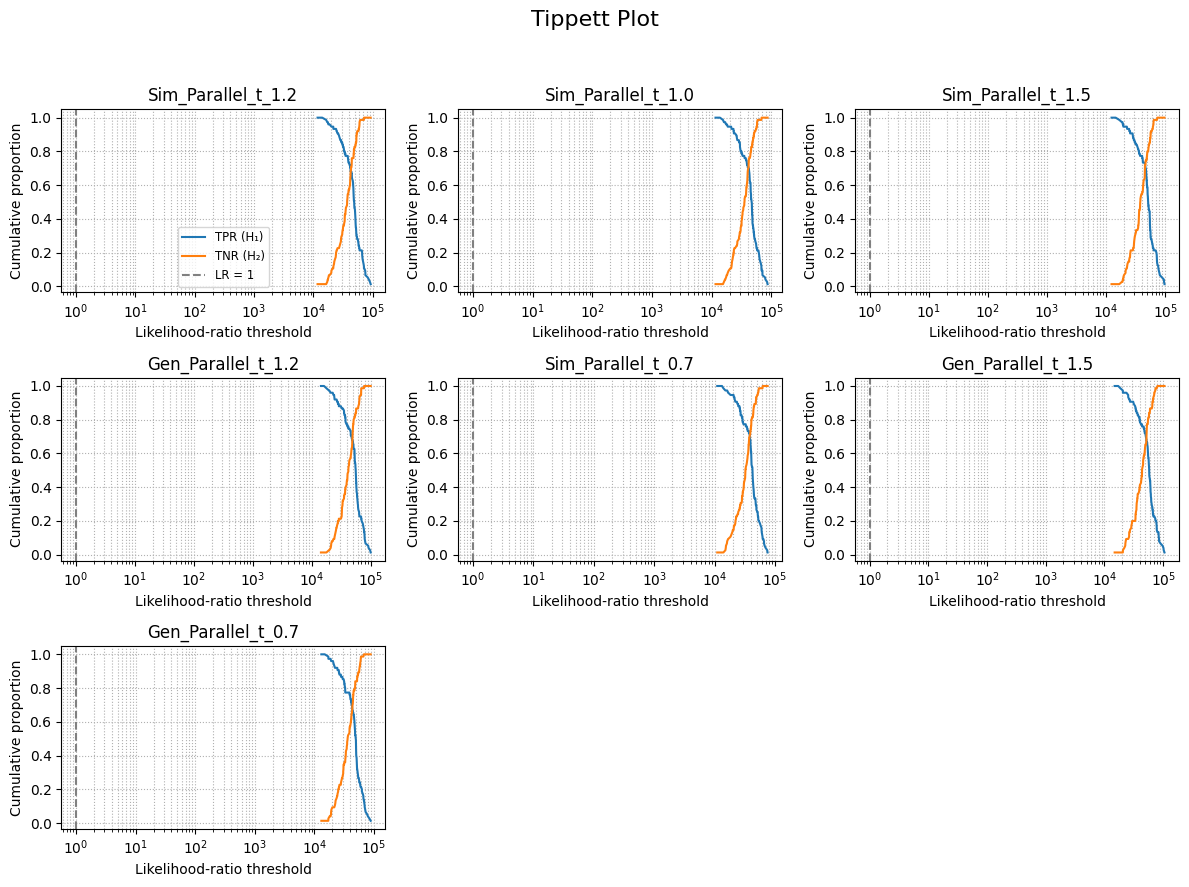

In [337]:
tippett_plot(cross_entropy_data, group_col='description')

In [338]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(cross_entropy_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description'
        )

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.925561,0.925561,0.346667,0.112446,-0.106088,75,75,0.689956,0.666667,0.662338,0.680000,0.671053,51,26,24,49
1,Gen_Parallel_t_1.2,Wiki-training,0.927343,0.927343,0.333333,0.110964,-0.103325,75,75,0.689956,0.653333,0.645570,0.680000,0.662338,51,28,24,47
2,Gen_Parallel_t_1.5,Wiki-training,0.925119,0.925119,0.346667,0.115045,-0.105993,75,75,0.692089,0.666667,0.662338,0.680000,0.671053,51,26,24,49
3,Sim_Parallel_t_0.7,Wiki-training,0.921423,0.921423,0.306667,0.119436,-0.111018,75,75,0.690489,0.693333,0.688312,0.706667,0.697368,53,24,22,51
4,Sim_Parallel_t_1.0,Wiki-training,0.918595,0.918595,0.306667,0.125594,-0.113876,75,75,0.695289,0.700000,0.697368,0.706667,0.701987,53,23,22,52
5,Sim_Parallel_t_1.2,Wiki-training,0.920488,0.920488,0.293333,0.122894,-0.110825,75,75,0.687289,0.680000,0.680000,0.680000,0.680000,51,24,24,51
6,Sim_Parallel_t_1.5,Wiki-training,0.911151,0.911151,0.280000,0.137566,-0.123281,75,75,0.698133,0.673333,0.662500,0.706667,0.683871,53,27,22,48


## Paraphrase Renyi

In [339]:
renyi_data = combine_and_aggregate_results_data(renyi_dir, method='renyi', group_cols=['description', 'problem', 'target'])
renyi_data = split_description(renyi_data)

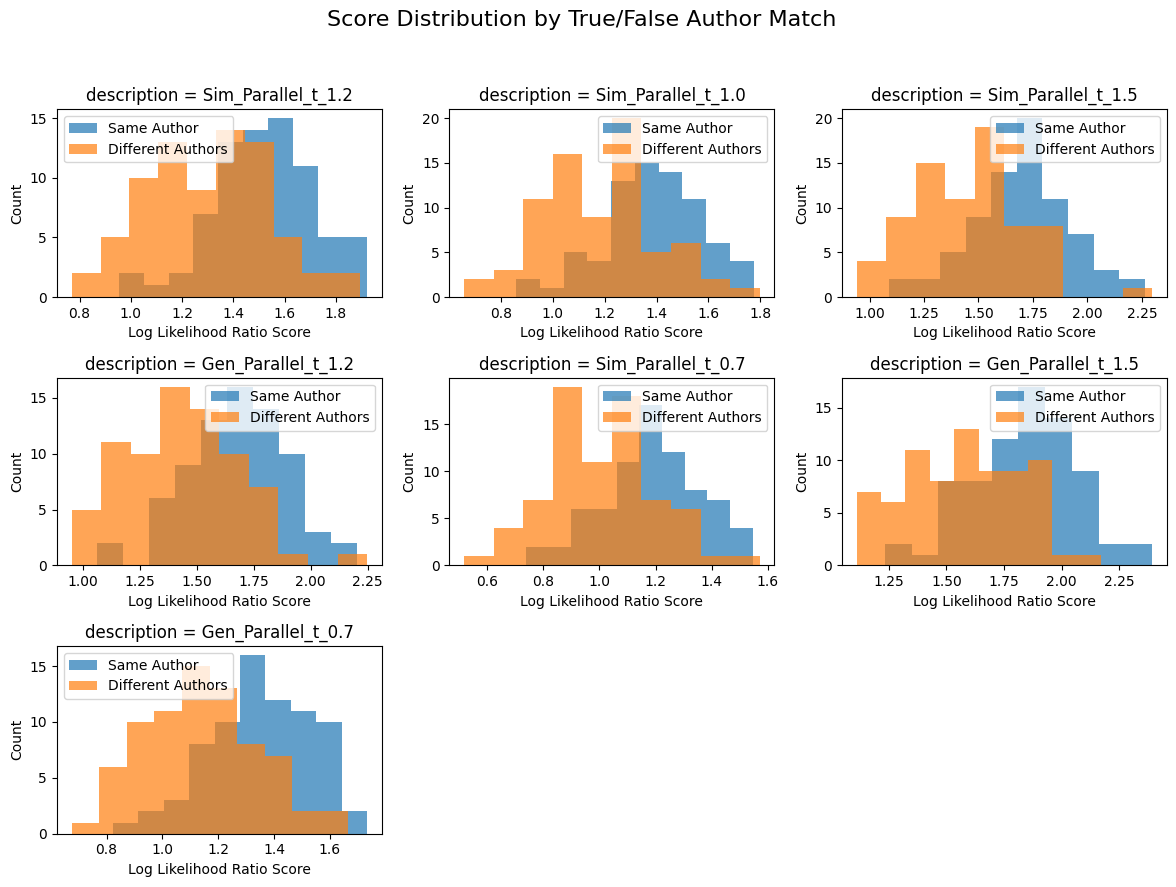

In [340]:
distribution_plot(renyi_data, group_col='description')

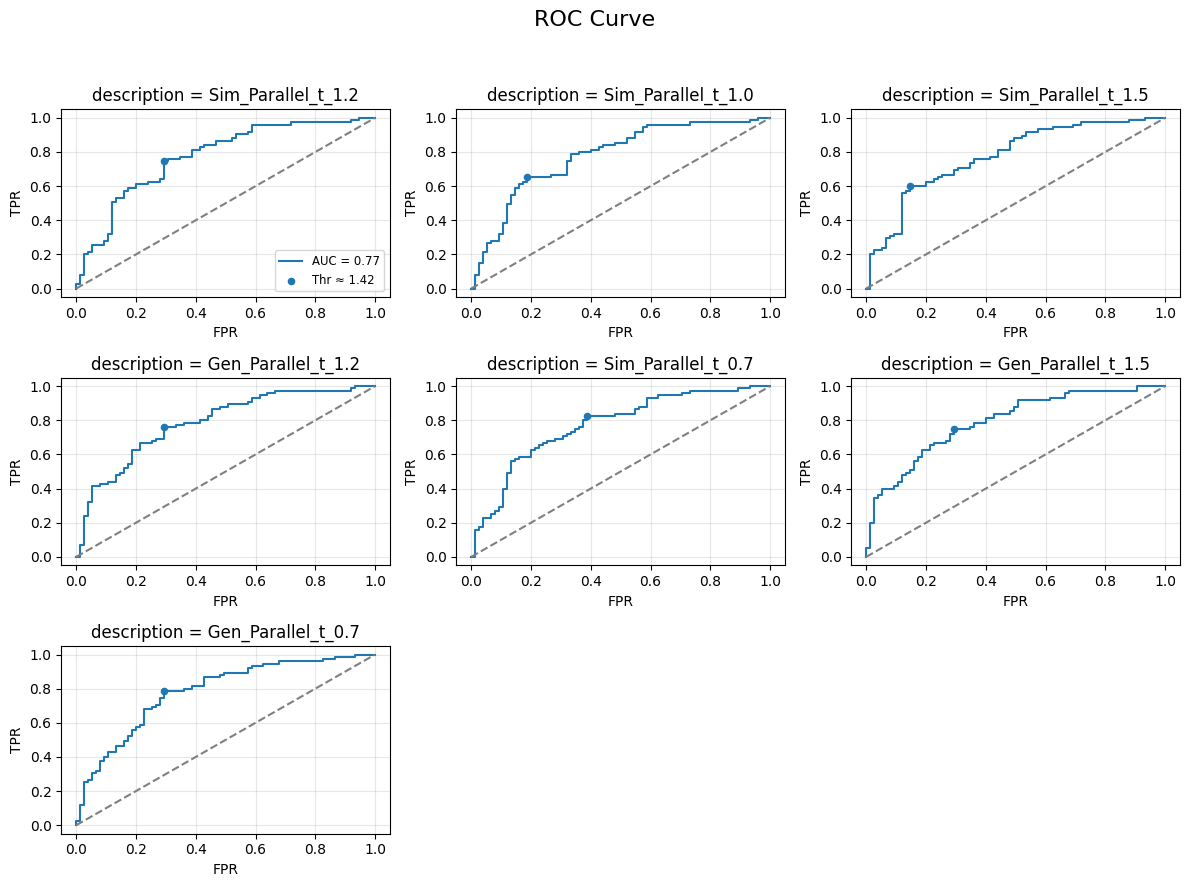

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Sim_Parallel_t_1.2  0.773867        1.421282  0.732026  0.726667
Sim_Parallel_t_1.0  0.778133        1.342696  0.710145  0.733333
Sim_Parallel_t_1.5  0.774400        1.662892  0.687023  0.726667
Gen_Parallel_t_1.2  0.786311        1.550896  0.740260  0.733333
Sim_Parallel_t_0.7  0.771200        1.056080  0.746988  0.720000
Gen_Parallel_t_1.5  0.791644        1.711436  0.732026  0.726667
Gen_Parallel_t_0.7  0.782578        1.219481  0.756410  0.746667

Confusion Matrix for description = Sim_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      53      22
Actual 1      19      56

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      61      14
Actual 1      26      49

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      64      11
Actual 1      30   

In [341]:
roc_plot(renyi_data, group_col='description')

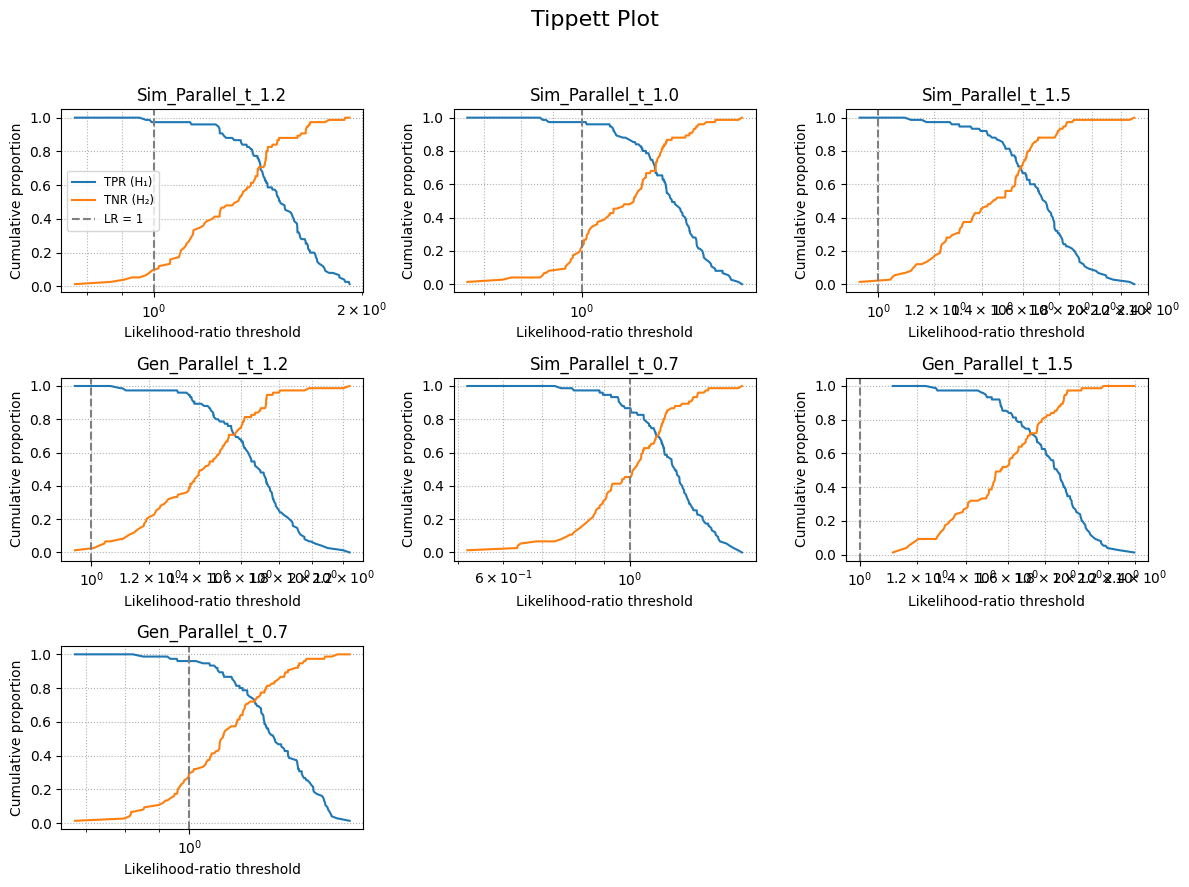

In [342]:
tippett_plot(renyi_data, group_col='description')

In [343]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(renyi_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description'
        )

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.859900,0.859900,0.280000,0.128001,-0.128520,75,75,0.769067,0.720000,0.720000,0.720000,0.720000,54,21,21,54
1,Gen_Parallel_t_1.2,Wiki-training,0.855095,0.855095,0.293333,0.141386,-0.142212,75,75,0.773156,0.713333,0.710526,0.720000,0.715232,54,22,21,53
2,Gen_Parallel_t_1.5,Wiki-training,0.832720,0.832720,0.293333,0.161332,-0.166714,75,75,0.781867,0.713333,0.705128,0.733333,0.718954,55,23,20,52
3,Sim_Parallel_t_0.7,Wiki-training,0.882426,0.882426,0.306667,0.103669,-0.105128,75,75,0.757156,0.686667,0.675000,0.720000,0.696774,54,26,21,49
4,Sim_Parallel_t_1.0,Wiki-training,0.867496,0.867496,0.320000,0.121868,-0.124668,75,75,0.765511,0.706667,0.691358,0.746667,0.717949,56,25,19,50
5,Sim_Parallel_t_1.2,Wiki-training,0.861806,0.861806,0.306667,0.129943,-0.133127,75,75,0.759289,0.700000,0.682927,0.746667,0.713376,56,26,19,49
6,Sim_Parallel_t_1.5,Wiki-training,0.859266,0.859266,0.320000,0.138840,-0.139210,75,75,0.762489,0.680000,0.670886,0.706667,0.688312,53,26,22,49


## Paraphrase Surprisal

In [344]:
surprisal_data = combine_and_aggregate_results_data(surprisal_dir, method='surprisal', group_cols=['description', 'problem', 'target'])
surprisal_data = split_description(surprisal_data)
surprisal_data.head(5)

,method,description,para_method,temp,para_model,av_method,problem,target,score
0,surprisal,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_surprisal,142.196.88.228 vs 142.196.88.228,True,0.537775
1,surprisal,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_surprisal,142.196.88.228 vs Aban1313,False,0.360819
2,surprisal,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_surprisal,A_Man_In_Black vs A_Man_In_Black,True,0.482872
3,surprisal,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_surprisal,A_Man_In_Black vs Bankhallbretherton,False,0.446715
4,surprisal,Sim_Parallel_t_1.2,Sim_Parallel,1.2,Qwen 2.5 1.5B,lambdaG_surprisal,Aban1313 vs Aban1313,True,0.474229


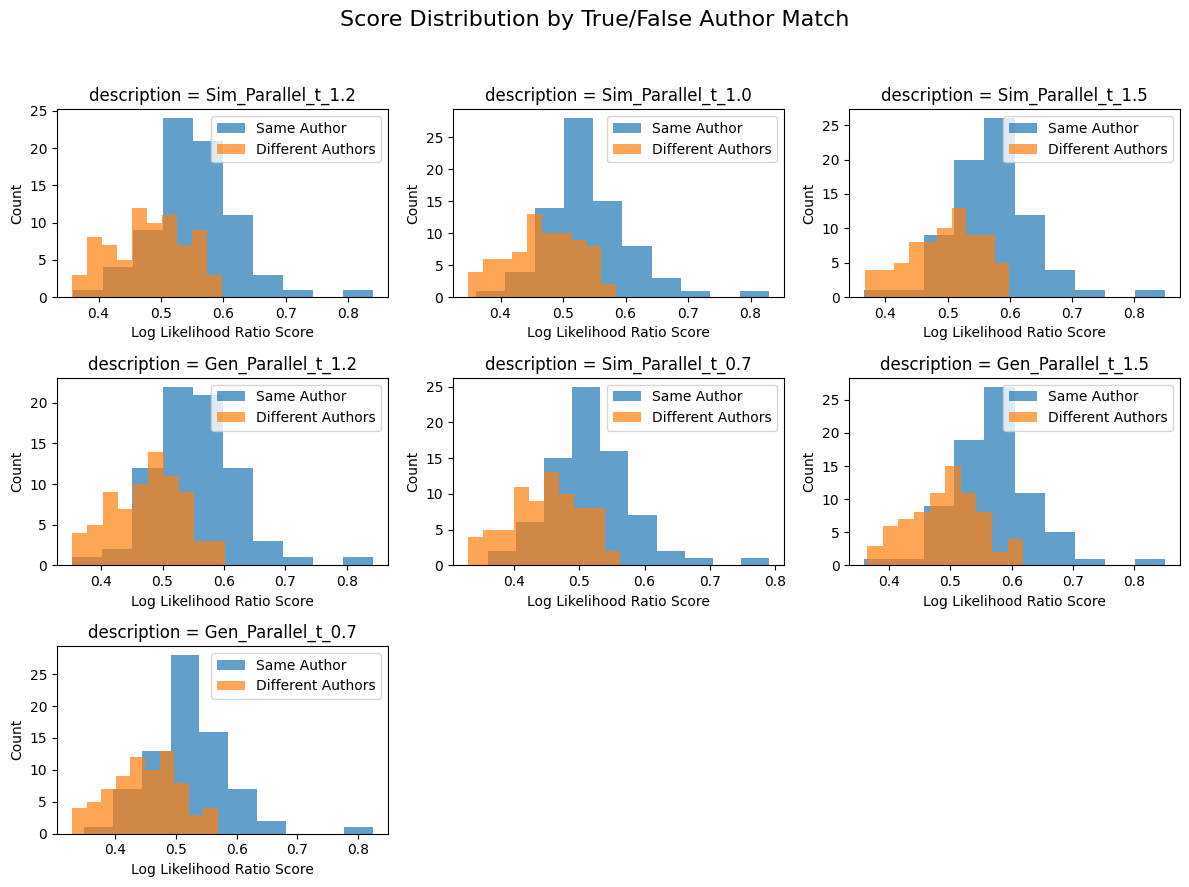

In [345]:
distribution_data = distribution_plot(surprisal_data, group_col='description')

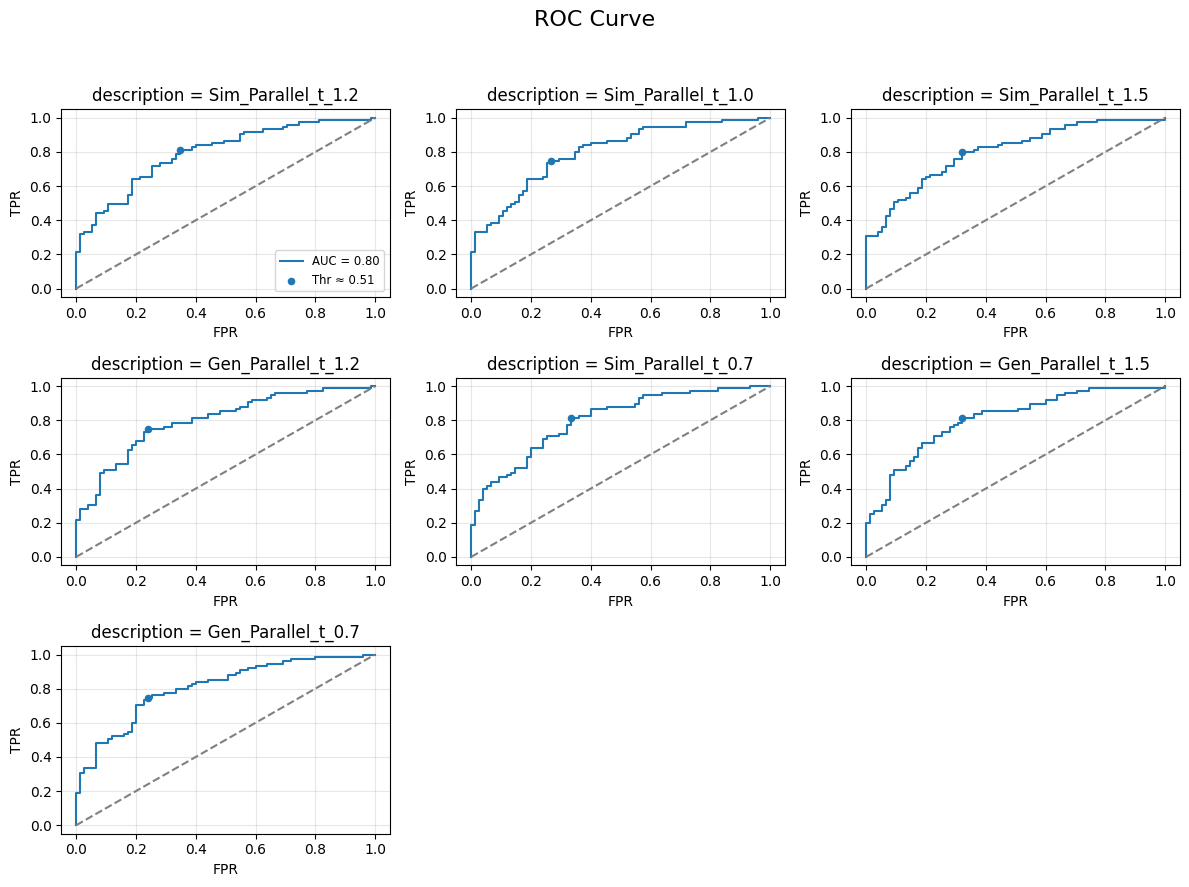

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Sim_Parallel_t_1.2  0.795911        0.505932  0.753086  0.733333
Sim_Parallel_t_1.0  0.800711        0.502862  0.741722  0.740000
Sim_Parallel_t_1.5  0.801600        0.527081  0.754717  0.740000
Gen_Parallel_t_1.2  0.798756        0.516967  0.751678  0.753333
Sim_Parallel_t_0.7  0.802667        0.476302  0.757764  0.740000
Gen_Parallel_t_1.5  0.804267        0.521667  0.762500  0.746667
Gen_Parallel_t_0.7  0.806578        0.487957  0.751678  0.753333

Confusion Matrix for description = Sim_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      49      26
Actual 1      14      61

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      55      20
Actual 1      19      56

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      51      24
Actual 1      15   

In [346]:
roc_plot(surprisal_data, group_col='description')

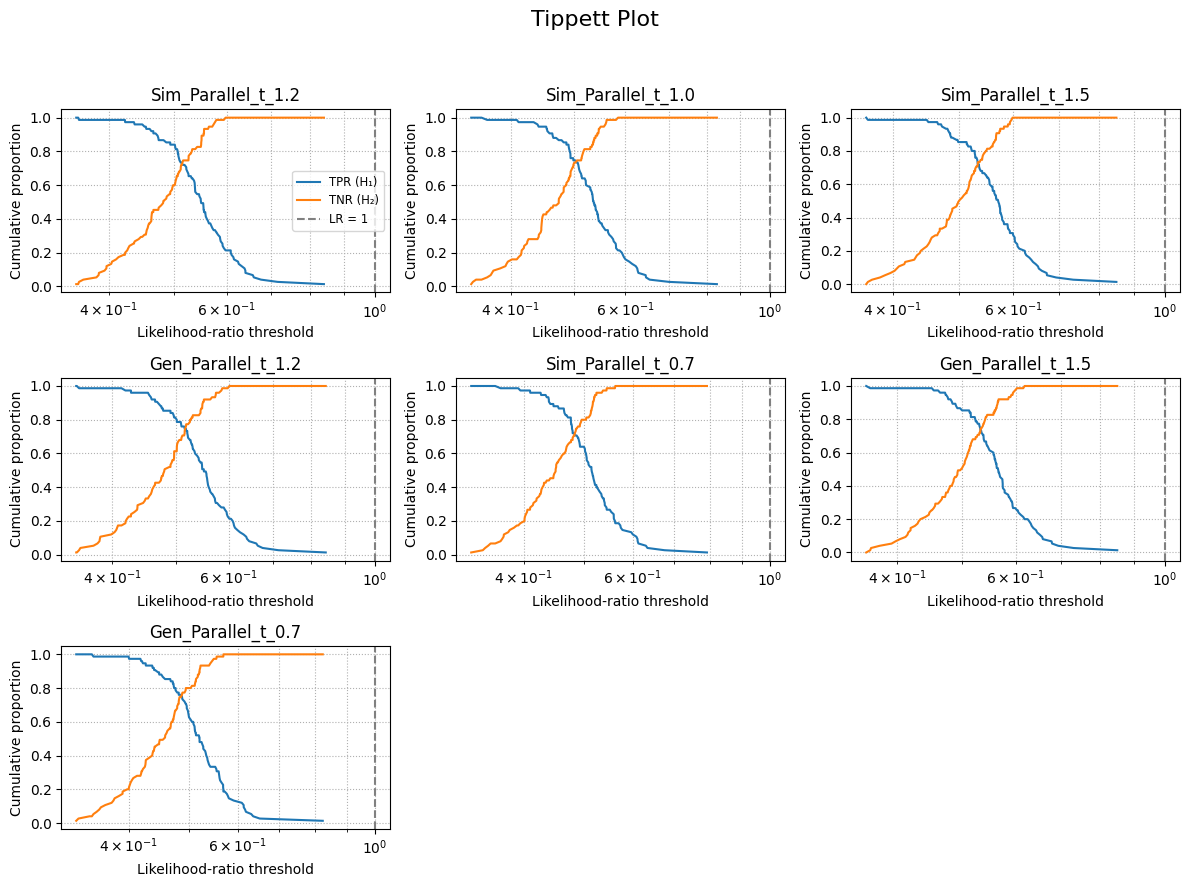

In [347]:
tippett_plot(surprisal_data, group_col='description')

In [348]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(surprisal_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description'
        )

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.952339,0.952339,0.306667,0.031569,-0.031549,75,75,0.764978,0.700000,0.697368,0.706667,0.701987,53,23,22,52
1,Gen_Parallel_t_1.2,Wiki-training,0.952031,0.952031,0.306667,0.032039,-0.031982,75,75,0.756978,0.693333,0.688312,0.706667,0.697368,53,24,22,51
2,Gen_Parallel_t_1.5,Wiki-training,0.952317,0.952317,0.306667,0.031656,-0.031811,75,75,0.759644,0.700000,0.697368,0.706667,0.701987,53,23,22,52
3,Sim_Parallel_t_0.7,Wiki-training,0.955404,0.955404,0.320000,0.029353,-0.029379,75,75,0.755733,0.686667,0.684211,0.693333,0.688742,52,24,23,51
4,Sim_Parallel_t_1.0,Wiki-training,0.953491,0.953491,0.306667,0.030807,-0.030806,75,75,0.756444,0.693333,0.698630,0.680000,0.689189,51,22,24,53
5,Sim_Parallel_t_1.2,Wiki-training,0.953795,0.953795,0.320000,0.030739,-0.030703,75,75,0.749333,0.693333,0.688312,0.706667,0.697368,53,24,22,51
6,Sim_Parallel_t_1.5,Wiki-training,0.953945,0.953945,0.306667,0.030497,-0.030678,75,75,0.752533,0.680000,0.680000,0.680000,0.680000,51,24,24,51


## Paraphrase Hellinger

In [349]:
hellinger_data = combine_and_aggregate_results_data(hellinger_dir, method='hellinger', group_cols=['description', 'problem', 'target'])
hellinger_data = split_description(hellinger_data)

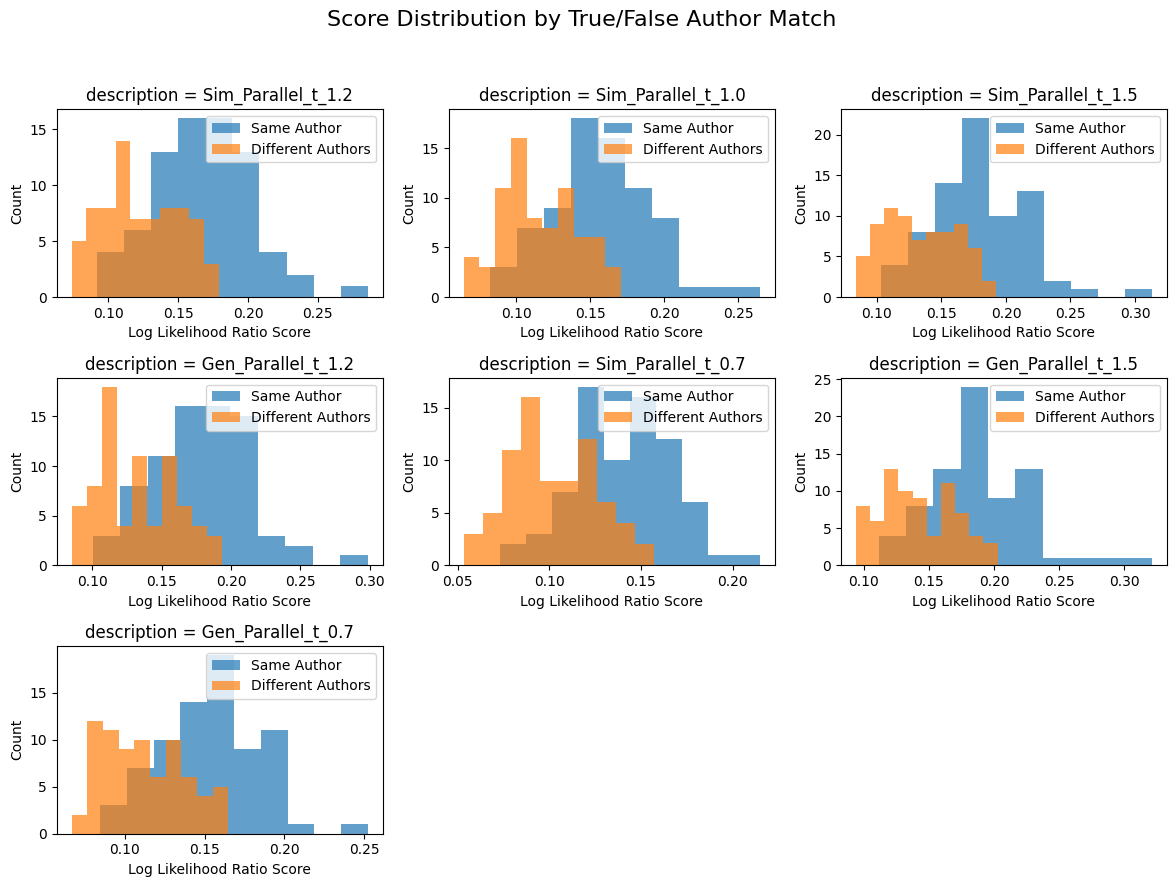

In [350]:
distribution_plot(hellinger_data, group_col='description')

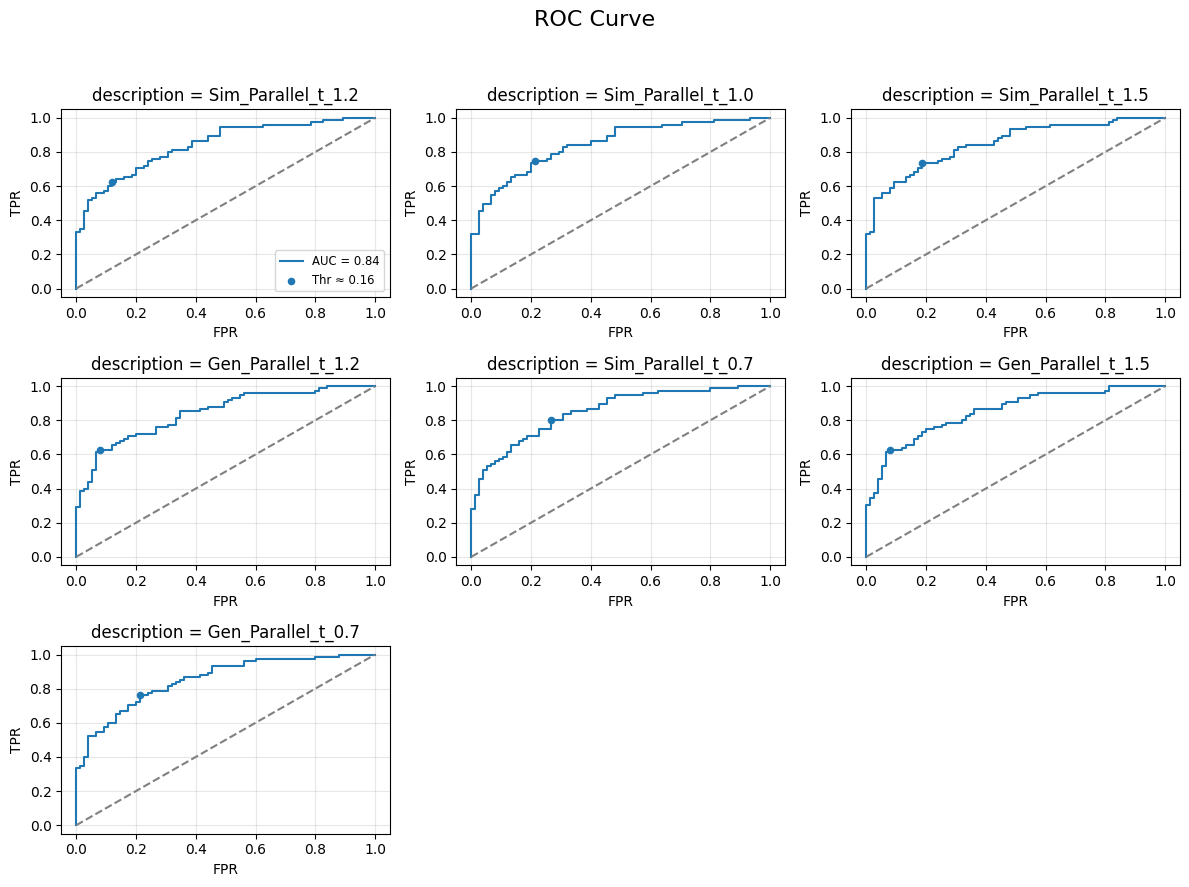

Per‑Group Summary Metrics:

                         AUC  Best Threshold  F1 Score  Accuracy
description                                                     
Sim_Parallel_t_1.2  0.841600        0.158719  0.717557  0.753333
Sim_Parallel_t_1.0  0.845333        0.138019  0.761905  0.766667
Sim_Parallel_t_1.5  0.848533        0.160722  0.763889  0.773333
Gen_Parallel_t_1.2  0.843378        0.173626  0.734375  0.773333
Sim_Parallel_t_0.7  0.851022        0.119481  0.774194  0.766667
Gen_Parallel_t_1.5  0.848711        0.182303  0.734375  0.773333
Gen_Parallel_t_0.7  0.851556        0.134544  0.770270  0.773333

Confusion Matrix for description = Sim_Parallel_t_1.2:
          Pred 0  Pred 1
Actual 0      66       9
Actual 1      28      47

Confusion Matrix for description = Sim_Parallel_t_1.0:
          Pred 0  Pred 1
Actual 0      59      16
Actual 1      19      56

Confusion Matrix for description = Sim_Parallel_t_1.5:
          Pred 0  Pred 1
Actual 0      61      14
Actual 1      20   

In [351]:
roc_plot(hellinger_data, group_col='description')

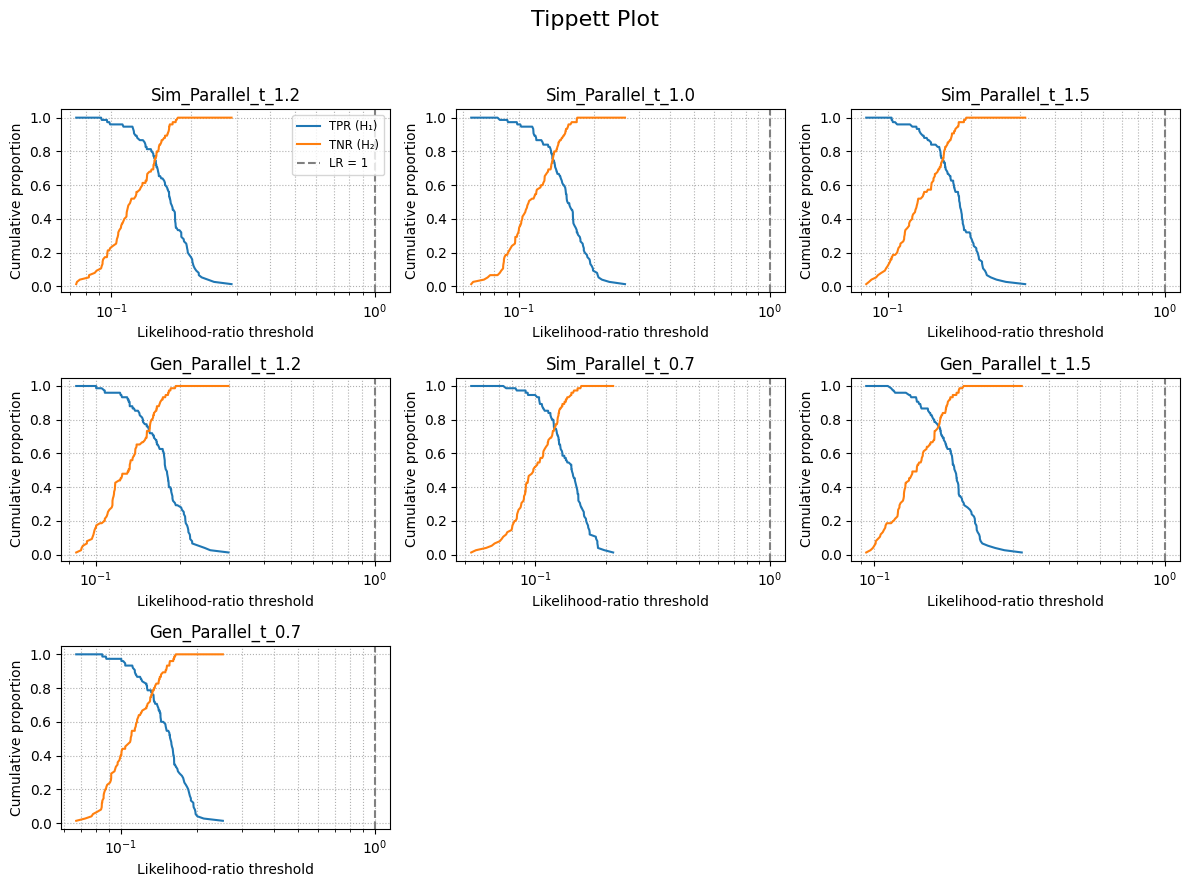

In [352]:
tippett_plot(hellinger_data, group_col='description')

In [353]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(hellinger_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='description'
        )

,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Gen_Parallel_t_0.7,Wiki-training,0.987432,0.987432,0.333333,0.007751,-0.007834,75,75,0.726933,0.666667,0.666667,0.666667,0.666667,50,25,25,50
1,Gen_Parallel_t_1.2,Wiki-training,0.983464,0.983464,0.333333,0.010234,-0.010380,75,75,0.740800,0.673333,0.671053,0.680000,0.675497,51,25,24,50
2,Gen_Parallel_t_1.5,Wiki-training,0.981779,0.981779,0.333333,0.011302,-0.011437,75,75,0.749689,0.666667,0.666667,0.666667,0.666667,50,25,25,50
3,Sim_Parallel_t_0.7,Wiki-training,0.990686,0.990686,0.386667,0.005737,-0.005793,75,75,0.700444,0.613333,0.619718,0.586667,0.602740,44,27,31,48
4,Sim_Parallel_t_1.0,Wiki-training,0.987248,0.987248,0.346667,0.007896,-0.007951,75,75,0.718222,0.653333,0.653333,0.653333,0.653333,49,26,26,49
5,Sim_Parallel_t_1.2,Wiki-training,0.985452,0.985452,0.373333,0.008996,-0.009125,75,75,0.726400,0.653333,0.657534,0.640000,0.648649,48,25,27,50
6,Sim_Parallel_t_1.5,Wiki-training,0.982975,0.982975,0.333333,0.010545,-0.010695,75,75,0.740267,0.666667,0.666667,0.666667,0.666667,50,25,25,50


## Combine Data

In [354]:
combined_data = pd.concat([v1_data, v2_data, jsd_data, renyi_data, cross_entropy_data, surprisal_data, hellinger_data])

In [355]:
combined_data['description'].unique()

array(['Gen_Parallel_t_1.2', 'Sim_Parallel_t_1.5',
       'Sim_Parallel_t_1.0', 'Sim_Parallel_t_1.2',
       'Sim_Parallel_t_0.7', 'Gen_Parallel_t_1.5',
       'Gen_Parallel_t_0.7'], dtype=object)

In [356]:
score_col = 'score'
target_col = 'target'
group_col='description'
performance(combined_data,
            score_col,
            target_col,
            additional_metadata={
                'corpus': "Wiki-training"
            },
            group_cols='method'
        )

,method,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,cross-entropy,Wiki-training,0.911617,0.911617,0.342857,0.122554,-0.109335,525,525,0.694592,0.661905,0.665370,0.651429,0.658325,342,172,183,353
1,hellinger,Wiki-training,0.891265,0.891265,0.268571,0.077136,-0.076469,525,525,0.818725,0.729524,0.736739,0.714286,0.725338,375,134,150,391
2,jsd,Wiki-training,0.864189,0.864189,0.264762,0.104466,-0.103142,525,525,0.804880,0.729524,0.734893,0.718095,0.726397,377,136,148,389
3,paraphrase_v1,Wiki-training,0.910611,0.910611,0.327619,0.123946,-0.110829,525,525,0.695764,0.666667,0.666034,0.668571,0.667300,351,176,174,349
4,paraphrase_v2,Wiki-training,0.884218,0.884218,0.304762,0.160984,-0.147006,525,525,0.727423,0.694286,0.700787,0.678095,0.689255,356,152,169,373
5,renyi,Wiki-training,0.900615,0.900615,0.344762,0.124791,-0.120943,525,525,0.707871,0.654286,0.656977,0.645714,0.651297,339,177,186,348
6,surprisal,Wiki-training,0.846705,0.846705,0.299048,0.134986,-0.130463,525,525,0.787701,0.702857,0.698324,0.714286,0.706215,375,162,150,363


In [357]:
score_col = 'score'
target_col = 'target'
group_col='description'
overall_results = performance(
    combined_data,
    score_col,
    target_col,
    additional_metadata={
        'corpus': "Wiki-training"
    },
    group_cols=['method', 'description']
    )

In [358]:
overall_results.sort_values('Balanced_Accuracy', ascending=False, inplace=True)

In [359]:
overall_results.head(20)

,method,description,corpus,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
35,renyi,Gen_Parallel_t_0.7,Wiki-training,0.859900,0.859900,0.280000,0.128001,-0.128520,75,75,0.769067,0.720000,0.720000,0.720000,0.720000,54,21,21,54
28,paraphrase_v2,Gen_Parallel_t_0.7,Wiki-training,0.912274,0.912274,0.266667,0.130737,-0.124279,75,75,0.709156,0.720000,0.726027,0.706667,0.716216,53,20,22,55
30,paraphrase_v2,Gen_Parallel_t_1.5,Wiki-training,0.892657,0.892657,0.280000,0.165898,-0.147440,75,75,0.718933,0.713333,0.722222,0.693333,0.707483,52,20,23,55
36,renyi,Gen_Parallel_t_1.2,Wiki-training,0.855095,0.855095,0.293333,0.141386,-0.142212,75,75,0.773156,0.713333,0.710526,0.720000,0.715232,54,22,21,53
37,renyi,Gen_Parallel_t_1.5,Wiki-training,0.832720,0.832720,0.293333,0.161332,-0.166714,75,75,0.781867,0.713333,0.705128,0.733333,0.718954,55,23,20,52
39,renyi,Sim_Parallel_t_1.0,Wiki-training,0.867496,0.867496,0.320000,0.121868,-0.124668,75,75,0.765511,0.706667,0.691358,0.746667,0.717949,56,25,19,50
20,jsd,Sim_Parallel_t_1.5,Wiki-training,0.967370,0.967370,0.306667,0.020594,-0.020747,75,75,0.782933,0.706667,0.691358,0.746667,0.717949,56,25,19,50
14,jsd,Gen_Parallel_t_0.7,Wiki-training,0.975938,0.975938,0.293333,0.014970,-0.015187,75,75,0.772089,0.706667,0.701299,0.720000,0.710526,54,23,21,52
4,cross-entropy,Sim_Parallel_t_1.0,Wiki-training,0.918595,0.918595,0.306667,0.125594,-0.113876,75,75,0.695289,0.700000,0.697368,0.706667,0.701987,53,23,22,52
33,paraphrase_v2,Sim_Parallel_t_1.2,Wiki-training,0.897442,0.897442,0.293333,0.156715,-0.141947,75,75,0.715378,0.700000,0.702703,0.693333,0.697987,52,22,23,53
